# Estatistica 1 - Introdução ao Pandas

* Manipulação de Dados com Pandas:

- Leitura de datasets utilizando a biblioteca Pandas.
    - Exploração e análise inicial dos dados, incluindo a verificação de dimensões (shape) e tipos de dados (dtypes).
    - Cálculo de estatísticas descritivas, como média, mediana e análise da distribuição de uma variável específica.

* Criação de Funções em Python:

    - Implementação de uma função para calcular a média aritmética de uma lista de valores.
    - Utilização dessa função personalizada para calcular a média de uma coluna de dados.

* Manipulação de Strings e Limpeza de Dados:

    - Técnicas de substituição e remoção de caracteres indesejados em colunas de texto utilizando Pandas.
    - Extração e transformação de valores monetários, incluindo a conversão de diferentes unidades (milhares, milhões) em valores numéricos.

* Visualização de Dados:

    - Criação de histogramas para visualizar a distribuição de uma variável numérica.
    - Análise visual dos dados para identificar padrões e anomalias.

* Aplicação de Transformações e Operações em DataFrames:

    - Criação de novas colunas derivadas de transformações aplicadas às colunas existentes.
    - Uso de funções lambda para aplicar transformações customizadas em um DataFrame.

* Análise Exploratória de Dados (EDA):

    - Identificação e análise de valores extremos (máximo e mínimo) em colunas numéricas.
    - Cálculo da média de valores monetários após a conversão e limpeza dos dados.

In [ ]:
!rm -rf fiap-graduacao-iachatbot/

In [ ]:
!git clone https://github.com/FIAPON/fiap-graduacao-iachatbot.git

In [ ]:
%cd fiap-graduacao-iachatbot/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")


In [ ]:
# Carrega o dataset FIFA 2019 de um arquivo CSV
df = pd.read_csv(r"dados/data_fifa2019.csv")

# Exibe as primeiras 5 linhas do dataframe para uma inspeção inicial dos dados
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
# Retorna o número de linhas e colunas do dataframe
df.shape

(18207, 89)

In [ ]:
# Exibe os tipos de dados de cada coluna do dataframe
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [ ]:
# Gera estatísticas descritivas da coluna 'Age' e transforma em um DataFrame transposto
df["Age"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0


In [ ]:
# Outra forma de exibir as estatísticas descritivas da coluna 'Age'
df.Age.describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [ ]:
# Define uma função para calcular a média aritmética de uma lista de valores
def media_aritmetica(x: list) -> float:
    N = len(x)  # Calcula o número de elementos na lista
    soma = 0
    for xi in x:
        soma += xi  # Soma todos os valores da lista
    media = soma / N  # Calcula a média
    return(media)

In [ ]:
# Calcula a média aritmética dos valores na coluna 'Age'
media_aritmetica(df.Age)


25.122205745043114

<Axes: >

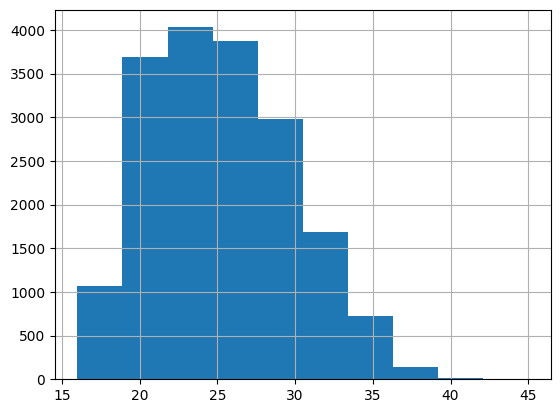

In [ ]:
# Cria um histograma para visualizar a distribuição dos valores na coluna 'Age'
# Um histograma é uma representação gráfica que mostra como os dados de uma determinada variável estão distribuídos.
# Ele divide os dados em intervalos (ou "bins") e conta quantos valores caem em cada intervalo.
# No gráfico, o eixo x representa os intervalos de valores (por exemplo, diferentes faixas de idades),
# e o eixo y mostra a frequência (ou quantidade) de dados que se encaixam em cada intervalo.
# Isso ajuda a entender a "forma" dos dados, como se estão concentrados em torno de um valor específico ou se estão espalhados.
df.Age.hist(bins=10)


In [ ]:
# Remove o símbolo "€" da coluna 'Release Clause' e cria uma nova coluna 'col_without_euro'
df["col_without_euro"] = df["Release Clause"].replace("€", "", regex=True)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,col_without_euro
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,196.4M


In [ ]:
# Extrai as unidades monetárias (M para milhões, K para milhares) da coluna 'col_without_euro' e armazena em uma nova coluna 'money'
df["money"] = df["col_without_euro"].str.extract(r'[\d\.]+([KM]+)', expand=False)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,col_without_euro,money
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,226.5M,M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,127.1M,M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,228.1M,M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,138.6M,M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,196.4M,M


In [ ]:
# Remove as unidades monetárias (M, K) da coluna 'col_without_euro', converte para float e preenche valores faltantes com 0
df["clean_col_without_euro"] = df["col_without_euro"].replace(["M", "K"], ["", ""], regex=True).astype(float, errors="ignore").fillna(0)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,col_without_euro,money,clean_col_without_euro
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,226.5M,M,226.5
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,127.1M,M,127.1
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,228.1M,M,228.1
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,138.6M,M,138.6
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,196.4M,M,196.4


In [ ]:
# Define as potências de 10 usadas para a conversão de valores monetários (milhões e milhares)
10**6, 10**3

(1000000, 1000)

In [ ]:
# Cria uma nova coluna 'real_money' convertendo os valores monetários de acordo com as unidades (M para milhões, K para milhares)
df = df.assign(
    real_money=df.apply(lambda x: x["clean_col_without_euro"] * 10**3 if x["money"] == "K" else x["clean_col_without_euro"] * 10**6, axis=1)
)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,col_without_euro,money,clean_col_without_euro,real_money
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,6.0,11.0,15.0,14.0,8.0,€226.5M,226.5M,M,226.5,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,7.0,11.0,15.0,14.0,11.0,€127.1M,127.1M,M,127.1,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,9.0,9.0,15.0,15.0,11.0,€228.1M,228.1M,M,228.1,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,90.0,85.0,87.0,88.0,94.0,€138.6M,138.6M,M,138.6,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,15.0,13.0,5.0,10.0,13.0,€196.4M,196.4M,M,196.4,196400000.0


In [ ]:
# Calcula o valor máximo da coluna 'real_money'
df.real_money.max()

228100000.0

In [ ]:
# Calcula a média dos valores na coluna 'real_money'
df.real_money.mean()


4191199.538638985

In [ ]:
# Calcula o valor mínimo da coluna 'real_money'
df.real_money.min()

0.0

In [ ]:
# Filtra o dataframe para mostrar as linhas onde 'real_money' é o valor máximo ou mínimo
df[(df.real_money == df.real_money.max()) | (df.real_money == df.real_money.min())]


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,col_without_euro,money,clean_col_without_euro,real_money
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,9.0,9.0,15.0,15.0,11.0,€228.1M,228.1M,M,228.1,228100000.0
28,28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,...,15.0,15.0,15.0,5.0,14.0,NaN,NaN,NaN,0.0,0.0
38,38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,...,5.0,12.0,7.0,5.0,10.0,NaN,NaN,NaN,0.0,0.0
91,91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,...,16.0,16.0,11.0,6.0,8.0,NaN,NaN,NaN,0.0,0.0
166,166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,...,13.0,11.0,13.0,12.0,10.0,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,17979,241341,Zhang Yuan,21,https://cdn.sofifa.org/players/4/19/241341.png,China PR,https://cdn.sofifa.org/flags/155.png,51,60,Guizhou Hengfeng FC,...,12.0,12.0,10.0,13.0,9.0,NaN,NaN,NaN,0.0,0.0
18026,18026,241444,Chen Ji,21,https://cdn.sofifa.org/players/4/19/241444.png,China PR,https://cdn.sofifa.org/flags/155.png,50,59,Guizhou Hengfeng FC,...,15.0,8.0,10.0,13.0,7.0,NaN,NaN,NaN,0.0,0.0
18031,18031,243506,Zhou Xin,20,https://cdn.sofifa.org/players/4/19/243506.png,China PR,https://cdn.sofifa.org/flags/155.png,50,61,Stabæk Fotball,...,11.0,7.0,9.0,10.0,6.0,NaN,NaN,NaN,0.0,0.0
18056,18056,244872,L. Valeau,19,https://cdn.sofifa.org/players/4/19/244872.png,Italy,https://cdn.sofifa.org/flags/27.png,50,65,Ascoli,...,8.0,11.0,13.0,14.0,14.0,NaN,NaN,NaN,0.0,0.0


In [ ]:
# Calcula a média aritmética dos valores na coluna 'real_money' utilizando a função definida anteriormente
media_aritmetica(df.real_money)

4191199.538638985

In [ ]:
# Outra forma de calcular a média dos valores na coluna 'real_money' diretamente com Pandas
df.real_money.mean()

4191199.538638985

# Exercício: Análise de Performance Defensiva dos Jogadores

Objetivo:
Neste exercício, você vai explorar e analisar as habilidades defensivas dos jogadores utilizando as colunas do dataset data_fifa2019.csv. O objetivo é entender a distribuição das habilidades de Marking, StandingTackle, e SlidingTackle entre os jogadores e como essas habilidades se relacionam com o desempenho geral (Overall) dos jogadores.

Instruções:

1. Filtragem dos Jogadores com Alto Potencial Defensivo:
    - Crie um novo dataframe filtrando os jogadores que têm um valor de Marking (marcação) maior ou igual a 70.
    - Exiba as primeiras 5 linhas desse novo dataframe.

2. Cálculo da Média de Habilidades Defensivas:
    - Calcule a média das colunas Marking, StandingTackle, e SlidingTackle para os jogadores filtrados.
    - Exiba essas médias.

3. Comparação entre Habilidades Defensivas e Overall:
    - Crie um scatter plot (gráfico de dispersão) para comparar o valor de Overall com Marking.
    - Faça o mesmo para StandingTackle e SlidingTackle em relação ao Overall.
    - Analise os gráficos: Existe alguma correlação visível entre o Overall e as habilidades defensivas?

4. Visualização da Distribuição de Habilidades:
    - Crie um histograma para cada uma das colunas Marking, StandingTackle, e SlidingTackle para visualizar a distribuição dessas habilidades entre os jogadores.

Perguntas para Reflexão:

- A média das habilidades defensivas indica que os jogadores com Marking alto também são bons em outras áreas defensivas?
- Existe uma correlação entre o valor de Overall e as habilidades defensivas? O que os gráficos de dispersão revelam?
- A distribuição das habilidades defensivas entre os jogadores é homogênea ou há uma concentração em determinados intervalos?

---

# Introdução à Estatística: Variância e Desvio Padrão

## O que é Variância?

A variância é uma medida que descreve o grau de dispersão dos dados em um conjunto. Em termos simples, ela nos diz o quão "espalhados" os valores estão em relação à média do conjunto de dados. A variância é uma medida essencial porque nos ajuda a entender a variabilidade dos dados, ou seja, quanto os valores diferem entre si.

Existem dois tipos principais de variância:

1. **Variância da População**: Utilizada quando se analisa toda a população (ou todos os elementos) do conjunto de dados. Ela é calculada como a média dos quadrados das diferenças entre cada ponto de dado e a média da população.

2. **Variância da Amostra**: Utilizada quando se trabalha com uma amostra de toda a população. Neste caso, a variância é calculada dividindo-se a soma dos quadrados das diferenças pela quantidade de elementos da amostra menos um (N-1). Este ajuste é feito para compensar o viés que pode ocorrer ao utilizar apenas uma amostra da população.

### Fórmulas:
- Variância da População (\(\sigma^2\)):  
\[\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2\]
  Onde:
  - \(N\) é o número total de elementos na população.
  - \(x_i\) representa cada valor no conjunto de dados.
  - \(\mu\) é a média da população.

- Variância da Amostra (\(s^2\)):  
  \[
  s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
  \]
  Onde:
  - \(n\) é o número de elementos na amostra.
  - \(x_i\) representa cada valor na amostra.
  - \(\bar{x}\) é a média da amostra.

## O que é Desvio Padrão?

O desvio padrão é a raiz quadrada da variância e fornece uma medida de dispersão dos dados em unidades que são as mesmas dos próprios dados. Ele nos dá uma ideia intuitiva de quanto os valores individuais do conjunto de dados tendem a diferir da média. O desvio padrão também é utilizado para determinar a consistência dos dados.

Existem dois tipos de desvio padrão:

1. **Desvio Padrão Populacional**: Calculado a partir da variância da população. É representado pela letra grega \(\sigma\).

2. **Desvio Padrão Amostral**: Calculado a partir da variância da amostra. É representado pela letra \(s\).

### Fórmulas:
- Desvio Padrão Populacional (\(\sigma\)):  
  \[
  \sigma = \sqrt{\sigma^2}
  \]

- Desvio Padrão Amostral (\(s\)):  
  \[
  s = \sqrt{s^2}
  \]

## Por que Calcular Variância e Desvio Padrão?

1. **Entender a Dispersão dos Dados**: A variância e o desvio padrão nos ajudam a entender o quanto os dados estão espalhados em relação à média. Um desvio padrão alto indica que os dados estão mais dispersos, enquanto um desvio padrão baixo sugere que os dados estão mais próximos da média.

2. **Comparar Consistência Entre Conjuntos de Dados**: Ao calcular o desvio padrão, podemos comparar a consistência ou variabilidade de diferentes conjuntos de dados. Por exemplo, podemos comparar o desempenho de jogadores de futebol em diferentes ligas ou equipes.

3. **Fundamental para Outras Análises Estatísticas**: Muitas técnicas estatísticas, como testes de hipóteses, regressão e análise de variância (ANOVA), dependem do cálculo da variância e do desvio padrão.

4. **Tomada de Decisão**: Entender a variabilidade dos dados é crucial para a tomada de decisões informadas, especialmente em campos como finanças, pesquisa científica, engenharia e análise de desempenho.

## Conclusão

A variância e o desvio padrão são ferramentas estatísticas fundamentais que fornecem insights sobre a variabilidade dos dados. Elas nos ajudam a compreender melhor os padrões dentro de um conjunto de dados e são amplamente utilizadas em muitas áreas de pesquisa e aplicação prática.



1. Variância da População: A variância da população é uma medida que nos ajuda a entender a dispersão dos dados em relação à média. Ela é calculada como a média dos quadrados das diferenças entre cada ponto de dados e a média da população.

In [ ]:
# Selecionar uma coluna numérica para análise, por exemplo, 'Overall'
overall_scores = df['Overall']

In [ ]:
# 1. Variância da População
pop_variance = np.var(overall_scores)
print(f'Variância da População: {pop_variance}')

2. Variância da Amostra: A variância da amostra é similar à variância da população, mas é calculada usando uma amostra dos dados. Para compensar o fato de que estamos usando apenas uma amostra, dividimos pela quantidade de elementos menos um (N-1) ao invés de N.

In [ ]:
# 2. Variância da Amostra
sample_variance = np.var(overall_scores, ddof=1)
print(f'Variância da Amostra: {sample_variance}')

3. Desvio Padrão Populacional: O desvio padrão populacional é a raiz quadrada da variância da população. Ele fornece uma medida da quantidade de variação ou dispersão dos valores de uma população.

In [ ]:
# 3. Desvio Padrão Populacional
pop_std_dev = np.std(overall_scores)
print(f'Desvio Padrão Populacional: {pop_std_dev}')

4. Desvio Padrão Amostral: O desvio padrão amostral é a raiz quadrada da variância amostral. Como a variância amostral, ela usa N-1 para ajustar a amostr

In [ ]:
# 4. Desvio Padrão Amostral
sample_std_dev = np.std(overall_scores, ddof=1)
print(f'Desvio Padrão Amostral: {sample_std_dev}')

---

In [ ]:
# Filtrando a coluna de interesse para a análise
ages = df['Age']
overall_scores = df['Overall']

## Amplitude

A amplitude é uma medida de dispersão que indica a diferença entre o valor máximo e o valor mínimo em um conjunto de dados. No código acima, utilizamos a função np.ptp() para calcular a amplitude das idades e das pontuações gerais dos jogadores. O gráfico de barras resultante ilustra visualmente a diferença de variação entre esses dois conjuntos de dados.

In [ ]:
# 4. Amplitude (Range)
age_range = np.ptp(ages)  # ptp() retorna o valor máximo - valor mínimo
overall_range = np.ptp(overall_scores)

plt.figure(figsize=(10, 5))
plt.bar(['Idade', 'Pontuação Geral'], [age_range, overall_range], color=['blue', 'green'])
plt.title('Amplitude de Idade e Pontuação Geral')
plt.ylabel('Amplitude')
plt.show()




## Quartis

Quartis são valores que dividem um conjunto de dados em quatro partes iguais. O primeiro quartil (Q1) representa o ponto abaixo do qual 25% dos dados caem, a mediana (ou segundo quartil) é o valor central, e o terceiro quartil (Q3) é o ponto abaixo do qual 75% dos dados se encontram. O boxplot visualiza esses quartis e ajuda a identificar a dispersão dos dados, outliers e simetria na distribuição.

In [ ]:
# 5. Quartis e Percentis
q1_overall = np.percentile(overall_scores, 25)  # Primeiro quartil
median_overall = np.median(overall_scores)      # Mediana (Segundo quartil)
q3_overall = np.percentile(overall_scores, 75)  # Terceiro quartil

plt.figure(figsize=(10, 5))
sns.boxplot(data=[overall_scores], orient='h')
plt.title('Boxplot de Pontuação Geral')
plt.xlabel('Pontuação Geral')
plt.show()


## Coeficiente de Variação (Coefficient of Variation)

O coeficiente de variação (CV) é uma medida de dispersão relativa que compara o desvio padrão com a média do conjunto de dados. Ele é expresso como uma porcentagem e oferece uma visão de quão variada é a distribuição dos dados em relação à média. Um CV mais baixo indica menos variabilidade em relação à média, enquanto um CV mais alto indica maior variabilidade.

In [ ]:
# 6. Coeficiente de Variação (Coefficient of Variation)
mean_overall = np.mean(overall_scores)
std_dev_overall = np.std(overall_scores)
cv_overall = (std_dev_overall / mean_overall) * 100



## Assimetria (Skewness)

A assimetria mede a simetria de uma distribuição de dados. Uma assimetria positiva indica que a cauda direita da distribuição é mais longa ou mais pesada do que a esquerda, enquanto uma assimetria negativa indica o contrário. No código acima, a função skew() é utilizada para calcular a assimetria de idades e pontuações gerais. Os histogramas resultantes com curvas de densidade (KDE) visualizam as distribuições dessas variáveis.

In [ ]:
# 7. Assimetria (Skewness)
skewness_ages = ages.skew()
skewness_overall = overall_scores.skew()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(ages, kde=True, color='blue')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')

plt.subplot(1, 2, 2)
sns.histplot(overall_scores, kde=True, color='green')
plt.title('Distribuição de Pontuação Geral')
plt.xlabel('Pontuação Geral')
plt.show()

## Curtose (Kurtosis)

Curtose é uma medida que descreve a "pontualidade" ou "achatamento" da distribuição de dados em comparação com uma distribuição normal. Uma curtose positiva indica uma distribuição com caudas pesadas e um pico acentuado (leptocúrtica), enquanto uma curtose negativa sugere uma distribuição mais achatada (platicúrtica). Aqui, a função kurtosis() é usada para medir a curtose das distribuições de idade e pontuação geral.

In [ ]:
# 8. Curtose (Kurtosis)
kurtosis_ages = ages.kurtosis()
kurtosis_overall = overall_scores.kurtosis()



## Contagem de Frequência (Frequency Count)

A contagem de frequência é uma análise que mostra o número de ocorrências de cada valor distinto em uma coluna de dados categóricos. Neste exemplo, a função value_counts() é usada para contar quantos jogadores vêm de cada nacionalidade. O gráfico de barras resultante exibe as 10 nacionalidades mais comuns, proporcionando uma visão clara da distribuição geográfica dos jogadores no dataset.

In [ ]:
# 9. Contagem de Frequência (Frequency Count)
nationality_frequency = df['Nationality'].value_counts()

plt.figure(figsize=(10, 5))
nationality_frequency.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Nacionalidades de Jogadores')
plt.ylabel('Número de Jogadores')
plt.xlabel('Nacionalidade')
plt.show()

In [ ]:
# Resultados
print("Análise Estatística:")
print(f"Amplitude de Idades: {age_range}")
print(f"Amplitude de Pontuação Geral: {overall_range}")
print(f"Q1 (Pontuação Geral): {q1_overall}")
print(f"Mediana (Pontuação Geral): {median_overall}")
print(f"Q3 (Pontuação Geral): {q3_overall}")
print(f"Coeficiente de Variação (Pontuação Geral): {cv_overall:.2f}%")
print(f"Assimetria de Idades: {skewness_ages}")
print(f"Assimetria de Pontuação Geral: {skewness_overall}")
print(f"Curtose de Idades: {kurtosis_ages}")
print(f"Curtose de Pontuação Geral: {kurtosis_overall}")
print("\nFrequência de Nacionalidades (Top 5):")
print(nationality_frequency.head())

---

# Exercício Prático: Análise Estatística de um Dataset do Kaggle

## Objetivo

Neste exercício, você será desafiado a aplicar os conceitos de análise estatística que discutimos em sala de aula. O objetivo é escolher um dataset do Kaggle, uma plataforma popular de datasets e competições de ciência de dados, e realizar algumas análises estatísticas básicas. Isso permitirá que você pratique a exploração e compreensão de conjuntos de dados reais, além de aplicar as técnicas estatísticas para obter insights.

## Instruções

1. **Acessar o Kaggle**: Vá até o site do Kaggle [Kaggle Datasets](https://www.kaggle.com/datasets).

2. **Escolher um Dataset**: Navegue pela coleção de datasets disponíveis e escolha um que lhe interesse. Pode ser relacionado a esportes, saúde, finanças, redes sociais, ou qualquer outro tópico de seu interesse. Certifique-se de que o dataset escolhido tenha colunas numéricas para facilitar a análise estatística.

3. **Fazer o Download do Dataset**: Crie uma conta no Kaggle, se ainda não tiver uma, e faça o download do dataset escolhido em formato CSV.

4. **Carregar o Dataset em um Jupyter Notebook**: Utilize a biblioteca Pandas para carregar o dataset em um DataFrame e explorar os primeiros registros para entender a estrutura dos dados.

5. **Realizar Análises Estatísticas**:

   - **Amplitude (Range)**: Calcule a amplitude para pelo menos duas colunas numéricas do dataset.
   
   - **Quartis e Mediana**: Calcule o primeiro quartil (Q1), a mediana e o terceiro quartil (Q3) para uma coluna numérica de sua escolha. Visualize esses quartis usando um boxplot.
   
   - **Coeficiente de Variação (Coefficient of Variation)**: Calcule o coeficiente de variação para uma coluna numérica para entender a dispersão dos dados em relação à média.
   
   - **Assimetria (Skewness)**: Calcule a assimetria para entender a distribuição de uma coluna numérica. Utilize um histograma para visualizar a distribuição.
   
   - **Curtose (Kurtosis)**: Calcule a curtose para analisar a pontualidade ou achatamento da distribuição dos dados.
   
   - **Contagem de Frequência (Frequency Count)**: Identifique a frequência de valores em uma coluna categórica, como a presença de diferentes categorias ou tipos de dados. Visualize as frequências em um gráfico de barras.

6. **Interpretar os Resultados**: Escreva uma breve interpretação dos resultados obtidos. O que as estatísticas indicam sobre os dados? Existe alguma tendência ou padrão interessante? Há outliers ou assimetrias que merecem atenção?

7. **Documentar o Processo**: Crie um markdown no seu notebook para explicar os conceitos estatísticos que você utilizou e os passos que seguiu para realizar a análise.

## Dicas

- Escolha um dataset com um tamanho razoável para facilitar a análise e visualização dos dados.
- Utilize gráficos para apoiar suas conclusões, como histogramas, boxplots e gráficos de barras.
- Lembre-se de comentar seu código para que outros possam entender o que cada parte faz.
- Não hesite em explorar mais de um dataset se estiver curioso. A prática com diferentes tipos de dados ajudará a solidificar seu entendimento.

---

Esse exercício ajudará você a aplicar conceitos teóricos em dados reais, desenvolvendo habilidades práticas valiosas para análise de dados e interpretação de resultados. Boa sorte!